In [2]:
__author__ = "@Tssp"
__date__   = "10/01/22"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['legend.fontsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2
aur = (1 + np.sqrt(5)) / 2
aursize = (5*aur, 5)

In [3]:
delta = np.loadtxt('Simulations/delta_asc.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [4]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [5]:
print(os.getcwd())
folder_path = "Simulations/ix7190_LiLi/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q2dq3d


In [6]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x18000_y18000_z18000_140rm8g2l60m8_80CM8g1L60M16_LiLi_a3Sup_0{d}_Li7Li7_nx6ny6nz6_nx6ny6nz6_ix7190iy4993iz4993_ix7190iy50iz50/Ag_B1u_vsLiLi3d1d_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.69000', '.69100', '.69200', '.69300', '.69400', '.69500', '.69600', '.69700', '.69800', '.69900', '.70000', '.70100', '.70200', '.70205', '.70210', '.70215', '.70220', '.70225', '.70230', '.70235', '.70240', '.70245', '.70316', '.70556', '.70557', '.70558', '.70559', '.70561', '.70562', '.70563', '.70564', '.70566', '.70567', '.70568', '.70569', '.70571', '.70572', '.70573', '.70574', '.70576', '.70577', '.70578', '.70579', '.70581', '.70582', '.70583', '.70584', '.70586', '.70587', '.70588', '.70589', '.70591', '.70592', '.70593', '.70594', '.70596', '.70597', '.70598', '.70599', '.70601', '.70602', '.70603', '.70604', '.70606', '.70607', '.70608', '.70609', '.70611', '.70612', '.70613', '.70614', '.70616', '.70617', '.70618', '.70619', '.70621', '.70622', '.70623', '.70624', '.70626', '.70627', '.70628', '.70629', '.70631', '.70632', '.70633', '.70634', '.70636', '.70637', '.70638', '.70639', '.70641', '.70642', '.70643', '.70644', '.70

In [7]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [8]:
dic = transpose_energies(Data)

In [9]:
least_bound_pos = 2050

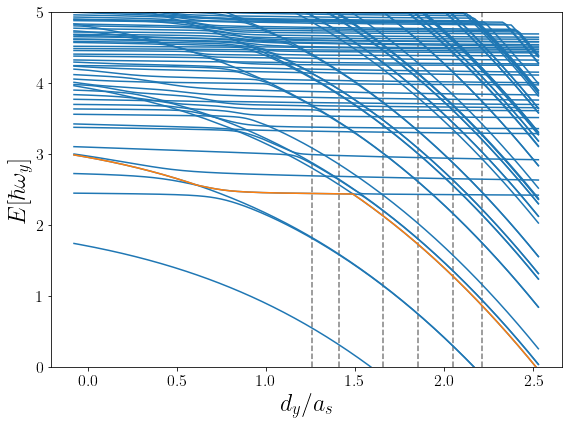

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 80):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'C0')
ax.plot(x, dic['nivel_2053']/wy, 'C1')
ax.set_ylim(0, 5)
#ax.set_xlim(-4, 4)
ax.vlines(x[130], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[115], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[90], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[70], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[50], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[33], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.set_xlabel('$d_{y}/a_s$')
ax.set_ylabel('$E[\hbar \omega_{y}]$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix7190_LiLi_3d_2d_Easc.png', dpi=200)
plt.show()

In [11]:
%matplotlib inline

## Resonance x<1

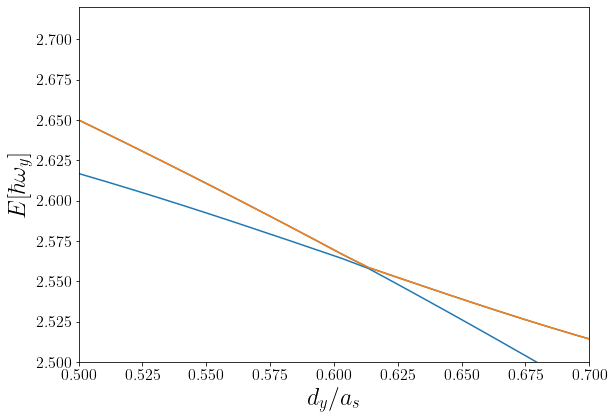

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, dic['nivel_2052']/wy, 'C0')
ax.plot(x, dic['nivel_2053']/wy, 'C1')
ax.set_ylim(0, 5)
#ax.set_xlim(-4, 4)
ax.vlines(x[130], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[115], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[90], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[70], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[50], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.vlines(x[33], 0, 10, alpha=0.5, linestyles='--', color='k')
ax.set_xlabel('$d_{y}/a_s$')
ax.set_ylabel('$E[\hbar \omega_{y}]$')
plt.tight_layout()
plt.xlim(0.5, 0.7)
plt.ylim(2.5, 2.72)
#fig.savefig('Results/Figures/Ix7802_LiLi_3d_2d_Easc.png', dpi=200)
plt.show()

## Resonance x>1

2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068


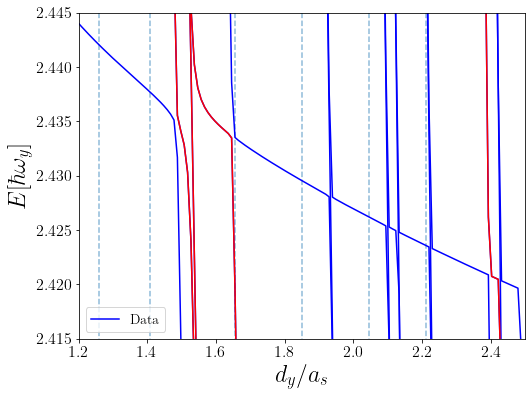

In [11]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos+2, least_bound_pos + 19):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_2054'.format(i)]/wy, 'r')
ax2.plot(x, dic['nivel_2055'.format(i)]/wy, 'r')
ax2.plot(x, dic['nivel_2056'.format(i)]/wy, 'r')
ax2.plot(x, dic['nivel_2066'.format(i)]/wy, 'r')
ax2.vlines(x[130], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[115], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[90], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[70], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[50], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[33], 0, 10, alpha=0.5, linestyles='--')
ax2.set_ylim(2.415, 2.445)
ax2.set_xlim(1.20, 2.50)
ax2.set_xlabel('$d_{y}/a_s$')
ax2.set_ylabel('$E[\hbar \omega_{y}]$')
ax2.legend(['Data'], fontsize=14)
plt.show()

In [12]:
print('''f Eigenstates:
2053: trap
2054: (2,0,0) ICIR
2055: (0,0,4)
2056: (0,4,0) ICIR
2057: (0,2,2)
2058: (0,0,6)
2059: (0,0,6) ? será otro
2060: (2,0,2)
2061: (2,2,0)
2062: (0,2,4)
2063: (0,4,2) 
2064: (0,0,8)
2065: 
2066: (4,0,0) ICIR
''')

f Eigenstates:
2053: trap
2054: (2,0,0) ICIR
2055: (0,0,4)
2056: (0,4,0) ICIR
2057: (0,2,2)
2058: (0,0,6)
2059: (0,0,6) ? será otro
2060: (2,0,2)
2061: (2,2,0)
2062: (0,2,4)
2063: (0,4,2) 
2064: (0,0,8)
2065: 
2066: (4,0,0) ICIR



In [13]:
print(f'''To find the eigenstates:
x={x[130]}, delta=0{delta[130]}
x={x[115]}, delta=0{delta[115]}
x={x[90]}, delta=0{delta[90]}
x={x[70]}, delta=0{delta[70]}
x={x[50]}, delta=0{delta[50]}
x={x[33]}, delta=0{delta[33]}
''')

To find the eigenstates:
x=1.2594368113556489, delta=0.70900
x=1.4087084519246929, delta=0.70825
x=1.655740694128729, delta=0.70700
x=1.8518107118323281, delta=0.70600
x=2.0465192587369625, delta=0.70500
x=2.2109655380775526, delta=0.70415



In [19]:
%matplotlib inline

# (2,0,0) (0,2,0)

5.102878567468112e-13
[0.0, -16.1486258611673 + 0.e-22*I, 1.48788134367227 - 0.e-22*I, 21.0750116994501 + 0.e-19*I]
Write the position of the correct solution: 2
[0.0, -16.1486258611673 + 0.e-22*I, 1.48788134367227 - 0.e-22*I, 21.0750116994501 + 0.e-19*I]
Write the position of the correct solution: 2
[0.0, -17.0178420334708 + 0.e-22*I, 1.52951158885253 - 0.e-21*I, 21.9025976265734 + 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -17.0178420334708 + 0.e-22*I, 1.52951158885253 - 0.e-21*I, 21.9025976265734 + 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -21.7747454390015 - 0.e-22*I, 2.39787914325316 + 0.e-22*I, 25.7911334777035 - 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -21.7747454390015 - 0.e-22*I, 2.39787914325316 + 0.e-22*I, 25.7911334777035 - 0.e-22*I]
Write the position of the correct solution: 2


(1.2, 2.5)

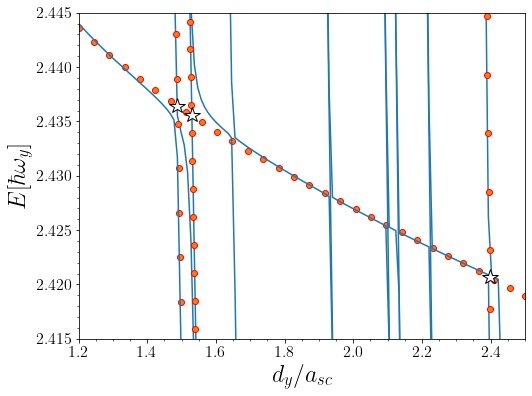

In [34]:
fig3, ax3 = plt.subplots(figsize=(8,6))
# nivel 2053:
trap_poly = trap_fit(dic, x, x_lims=(1.2, 1.5), y_lims=(2.37, 2.445) ,levels=(2052, 2066), tol=0.04, wy=wy)/wy
x2053 = np.linspace(1.2, 2.5, num=30)
ax3.scatter(x2053, np.polyval(trap_poly, x2053), edgecolor='r', facecolor='C1', label='Diabatic', zorder=1)
ax3.plot(x, dic['nivel_2053']/wy, 'C0', label='Adiabatic', zorder=2)

# nivel 2054:
ax3.plot(x, dic['nivel_2054']/wy, 'C0', zorder=1)
f2054 = np.polyfit(x[(x < 1.45) & (x > 1.35)], np.array(dic['nivel_2054'])[(x < 1.45) & (x > 1.35)]/wy, deg=1)
x2054 = np.linspace(1.35, 1.6, num=100)
ax3.scatter(x2054, np.polyval(f2054, x2054), edgecolor='r', facecolor='C1', zorder=2)

# nivel 2055:
ax3.plot(x, dic['nivel_2055']/wy, 'C0', zorder=1)
f2055 = np.polyfit(x[(x < 1.6) & (x > 1.5)], np.array(dic['nivel_2055'])[(x < 1.6) & (x > 1.5)]/wy, deg=1)
x2055 = np.linspace(1.50, 1.6, num=70)
ax3.scatter(x2055, np.polyval(f2055, x2055), edgecolor='r', facecolor='C1', zorder=2)

# nivel 2056:
ax3.plot(x, dic['nivel_2056']/wy, 'C0', zorder=1)

# nivel 2057:
ax3.plot(x, dic['nivel_2057']/wy, 'C0', zorder=1)

# nivel 2058:
ax3.plot(x, dic['nivel_2058']/wy, 'C0', zorder=1)

# nivel 2059:
ax3.plot(x, dic['nivel_2059']/wy, 'C0', zorder=1)

# nivel 2060:
ax3.plot(x, dic['nivel_2060']/wy, 'C0', zorder=1)

# nivel 2061:
ax3.plot(x, dic['nivel_2061']/wy, 'C0', zorder=1)

# nivel 2062:
ax3.plot(x, dic['nivel_2062']/wy, 'C0', zorder=1)

# nivel 2063:
ax3.plot(x, dic['nivel_2063']/wy, 'C0', zorder=1)

# nivel 2064:
ax3.plot(x, dic['nivel_2064']/wy, 'C0', zorder=1)

# nivel 2065:
ax3.plot(x, dic['nivel_2065']/wy, 'C0', zorder=1)

# nivel 2066:
ax3.plot(x, dic['nivel_2066']/wy, 'C0', zorder=1)
f2066 = np.polyfit(x[(x < 2.4) & (x > 2.3)], np.array(dic['nivel_2066'])[(x < 2.4) & (x > 2.3)]/wy, deg=1)
x2066 = np.linspace(2.35, 2.45, num=50)
ax3.scatter(x2066, np.polyval(f2066, x2066), edgecolor='r', facecolor='C1', zorder=2)

# Crosses:
##########
ax3.plot(cross_points(trap_poly, f2054), np.polyval(trap_poly, cross_points(trap_poly, f2054)), 'w*', markersize=16, markeredgecolor='k', label='ICIR')
ax3.plot(cross_points(trap_poly, f2055), np.polyval(trap_poly, cross_points(trap_poly, f2055)), 'w*', markersize=16, markeredgecolor='k')
ax3.plot(cross_points(trap_poly, f2066), np.polyval(trap_poly, cross_points(trap_poly, f2066)), 'w*', markersize=16, markeredgecolor='k')

# States:
#########
#ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.22, 2.635), xytext=(1.20, 2.637), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,0)}\right>$', xy=(1.17, 2.6305), xytext=(1.20, 2.6305), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,4)}\right>$', xy=(1.05, 3.355), xytext=(0.74, 3.36), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,0)}\right>$', xy=(1.31, 2.6357), xytext=(1.33, 2.6357), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax3.set_xlabel('$d_{y}/a_{sc}$')
ax3.set_ylabel('$E[\hbar \omega_{y}]$')
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.set_ylim(2.415, 2.445)
ax3.set_xlim(1.2, 2.5)
#fig3.savefig('Results/Figures/LiLi_2d3d_7190_Easc_Interpolation_200_v2.png', bbox_inches="tight", dpi=200)

In [35]:
print(f'''Crosses between (x, E):
* trap-(2,0,0): ({cross_points(trap_poly, f2054)}, {np.polyval(trap_poly, cross_points(trap_poly, f2054))})
* trap-(0,4,0): ({cross_points(trap_poly, f2055)}, {np.polyval(trap_poly, cross_points(trap_poly, f2055))})
* trap-(4,0,0): ({cross_points(trap_poly, f2066)}, {np.polyval(trap_poly, cross_points(trap_poly, f2066))})
''')

[0.0, -16.1486258611673 + 0.e-22*I, 1.48788134367227 - 0.e-22*I, 21.0750116994501 + 0.e-19*I]
Write the position of the correct solution: 2
[0.0, -16.1486258611673 + 0.e-22*I, 1.48788134367227 - 0.e-22*I, 21.0750116994501 + 0.e-19*I]
Write the position of the correct solution: 2
[0.0, -17.0178420334708 + 0.e-22*I, 1.52951158885253 - 0.e-21*I, 21.9025976265734 + 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -17.0178420334708 + 0.e-22*I, 1.52951158885253 - 0.e-21*I, 21.9025976265734 + 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -21.7747454390015 - 0.e-22*I, 2.39787914325316 + 0.e-22*I, 25.7911334777035 - 0.e-22*I]
Write the position of the correct solution: 2
[0.0, -21.7747454390015 - 0.e-22*I, 2.39787914325316 + 0.e-22*I, 25.7911334777035 - 0.e-22*I]
Write the position of the correct solution: 2
Crosses between (x, E):
* trap-(2,0,0): (1.48788134367227, 2.43644012722491)
* trap-(0,4,0): (1.52951158885253, 2.43555079894162)
* trap-(4,0,0): (2.39787914325

In [1]:
print(f'''Crosses between (x, E):
* trap-(2,0,0): ({1/cross_points(trap_poly, f2054)})
* trap-(0,4,0): ({1/cross_points(trap_poly, f2055)})
* trap-(4,0,0): ({1/cross_points(trap_poly, f2068)})
''')

NameError: name 'cross_points' is not defined